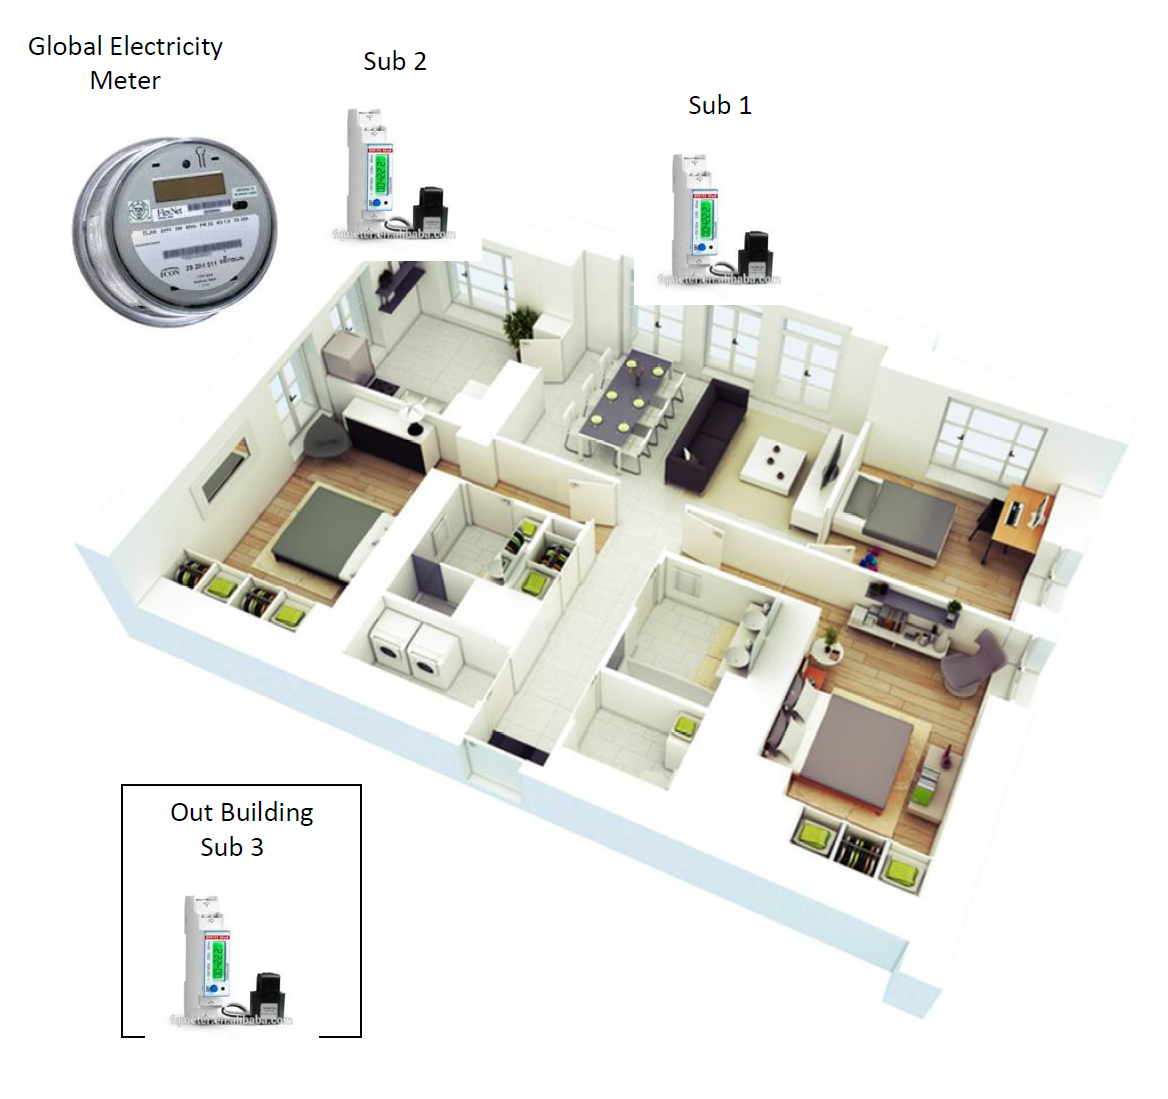

In [4]:
import numpy as np
import pandas as pd
import calendar
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df = pd.read_pickle('power_consumption')

## Raw data in Table view

In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
20000,30/12/2006,14:44:00,2.014,0.402,240.33,8.6,0.0,1.0,18.0,2006-12-30 14:44:00
20001,30/12/2006,14:45:00,2.170,0.512,240.96,9.2,0.0,0.0,18.0,2006-12-30 14:45:00
20002,30/12/2006,14:46:00,2.194,0.520,241.18,9.2,0.0,0.0,17.0,2006-12-30 14:46:00
20003,30/12/2006,14:47:00,2.172,0.514,240.98,9.2,0.0,0.0,18.0,2006-12-30 14:47:00
20004,30/12/2006,14:48:00,2.188,0.518,241.02,9.2,0.0,0.0,18.0,2006-12-30 14:48:00


##### The Data is not all the same (Global_avtive_power is in kW and sub_meetering_1 / 2 / 3 are in Units). The data is not aligned with each other -> Time Stamp it

In [8]:
df.index = df['Datetime']


Creating a specific weekly view
Creating a specific monthly view


In [9]:
df['Day_name'] = [calendar.day_name[x] for x in df.Datetime.dt.dayofweek]

In [10]:
year = df['2007-01-01':'2007-03-31']
jan = df['2007-01-01':'2007-01-31']
feb = df['2007-02-01':'2007-02-28']
mar = df['2007-03-01':'2007-03-31']

# 3 Month View - January - March

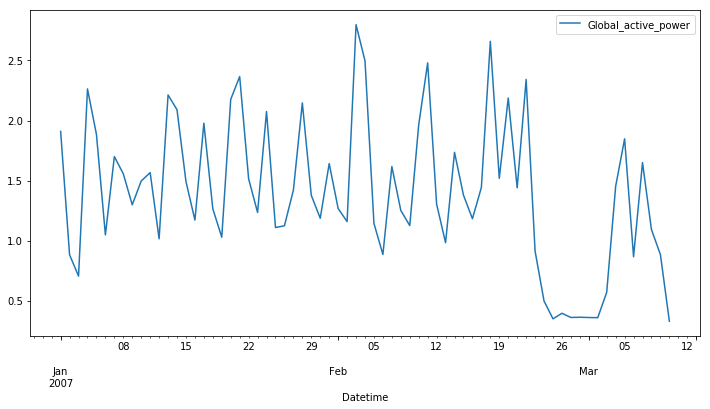

In [21]:
year.resample('1d').mean().plot(y='Global_active_power', figsize=(12, 6))

# View of January 2007

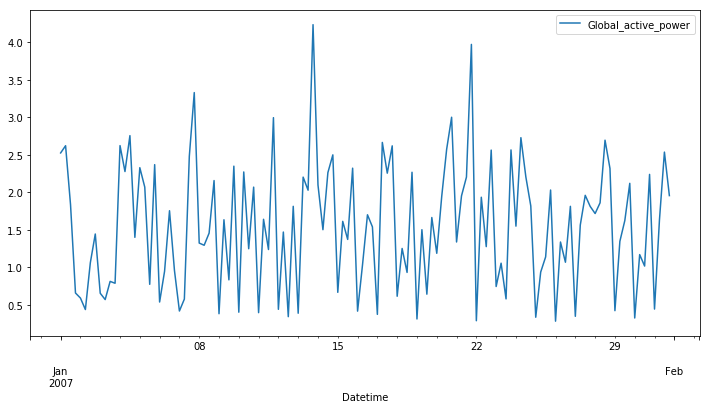

In [18]:
jan.resample('6H').mean().plot(y='Global_active_power', figsize=(12, 6))

# View of February 2007

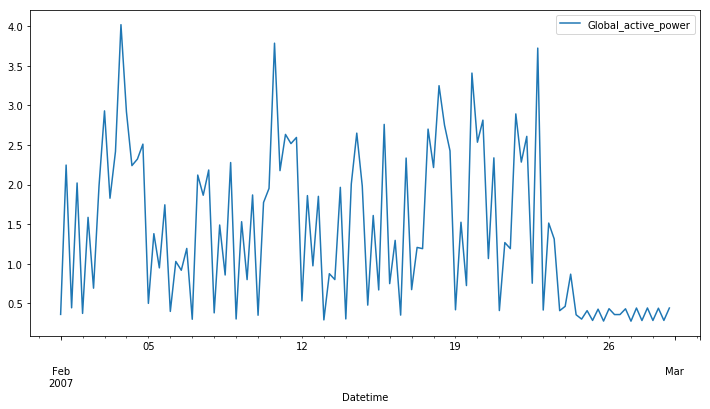

In [19]:
feb.resample('6H').mean().plot(y='Global_active_power', figsize=(12, 6))

# View of March 2007

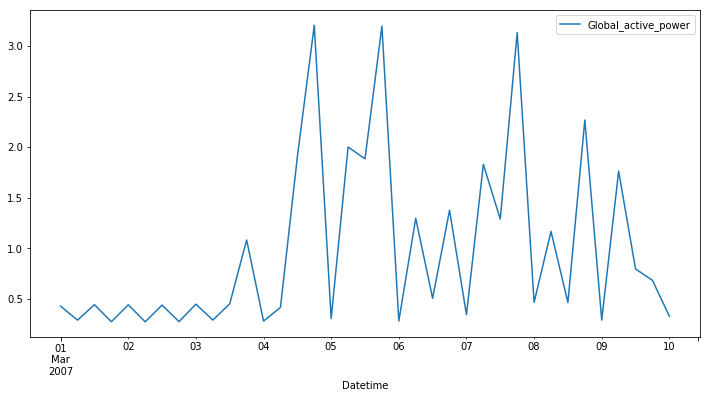

In [20]:
mar.resample('6H').mean().plot(y='Global_active_power', figsize=(12, 6))

#### Looking at end of February and the beginning of March we see that a little power is consumed – this most likely is the Fridge, Freezer and any small appliance power supplies left plugged in. the smaller spikes are when the Fridge / Freezer turns on / off. We can assume that the tenants were away from the 24th Feb to the 3rd of March

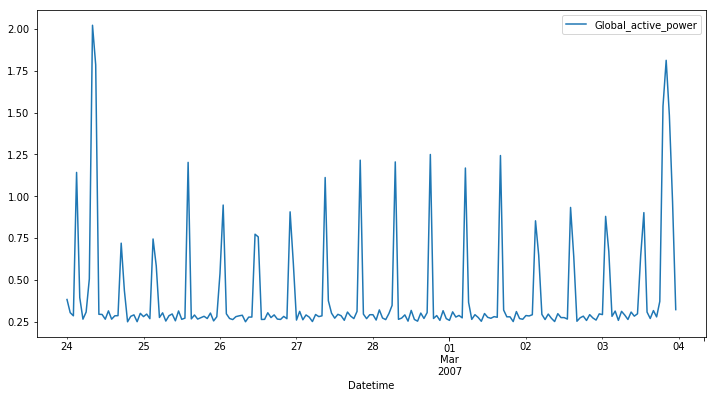

In [22]:
hol = df['2007-02-24':'2007-03-03']
hol.resample('1H').mean().plot(y='Global_active_power', figsize=(12, 6))

### Overlay week 2 with week 3, from this we can see that that the energy consumption for the house was similar to each other

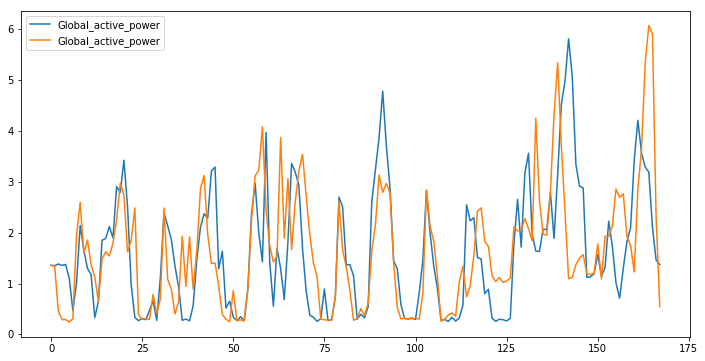

In [30]:
week1_jan = df['2007-01-08':'2007-01-14']
axis = week1_jan.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6))
week2_jan = df['2007-01-15':'2007-01-21']
week2_jan.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6), ax=axis)

#### This view compares two days to each other and Monday 8th & 15th. From this we can see that from 6 in the morning you get a spike – this could be when the family start their day. We could assume that they all leave the house at 10 – 12.

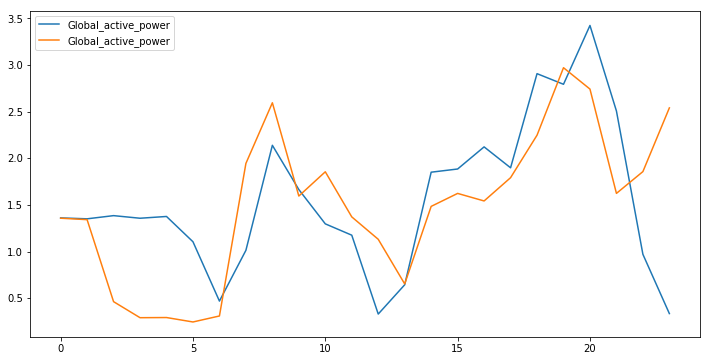

In [78]:
day1 = df['2007-01-08 00:00:00' : '2007-01-08 23:55:00']
axis = day1.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6))
day2 = df['2007-01-15 00:00:00' : '2007-01-15 23:55:00']
day2.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6), ax=axis)

#### Sub 1 - Kitchen Area [Dishwasher, Oven, Microwave]
#### Sub 2 - Laundry Area [Washing Machine, Tumble Dryer, Fridge]
#### Sub 3 – Water Heater [Geyser, AC] 
### Graph 1
#### Global meter 
### Graph 2 – Kitchen
#### From this we can see that on Saturday we cooked instead of getting take out 
### Graph 3 – Laundry
#### From we can see that the smaller spikes are when the lights are switched on, Washing Machine used, and the Fridge opened
### Graph 4 – Water Heater
#### From this we can see that the Geysers temp changes from morning to evening indicating hot water being drawn out  


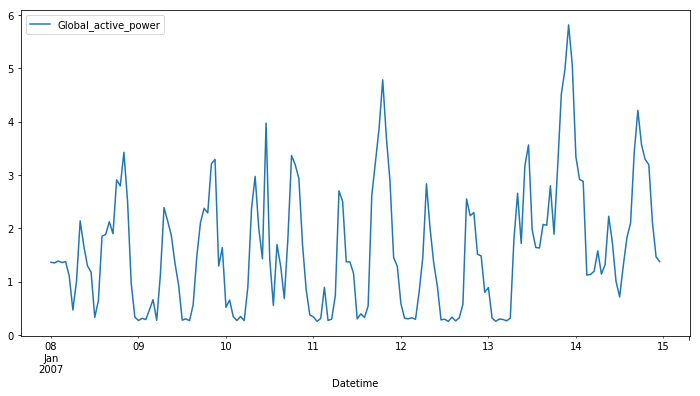

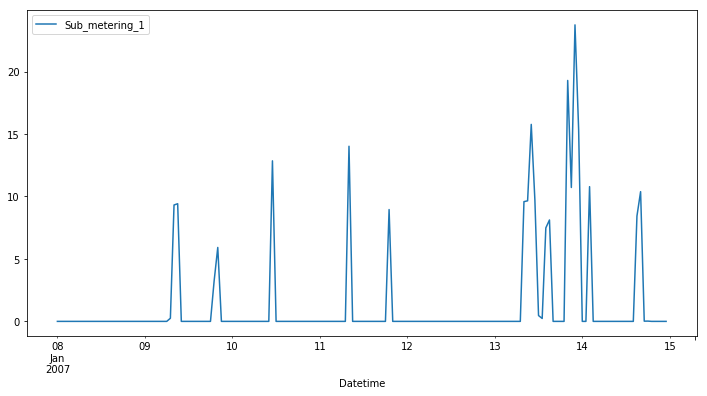

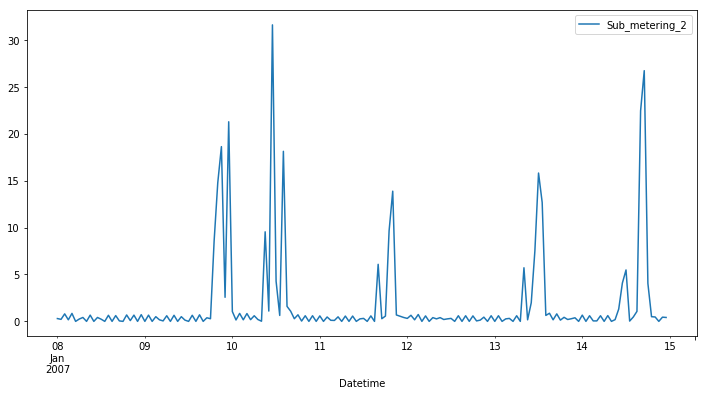

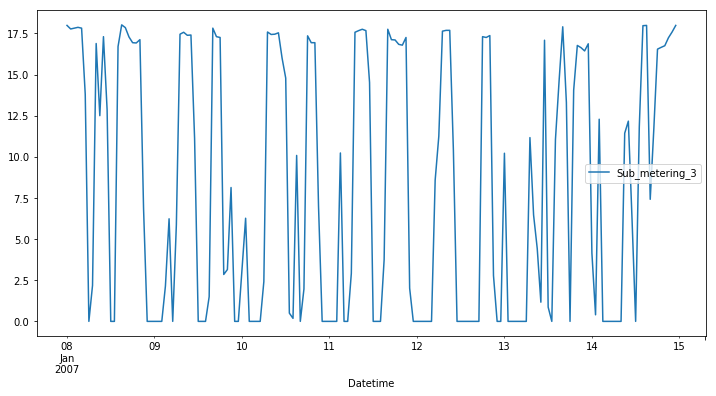

In [79]:
week1_jan = df['2007-01-08':'2007-01-14']
week1_jan.resample('1H').mean().plot(y='Global_active_power', figsize=(12, 6))
sub1_week1_jan = df['2007-01-08':'2007-01-14']
sub1_week1_jan.resample('1H').mean().plot(y='Sub_metering_1', figsize=(12, 6))
sub2_week1_jan = df['2007-01-08':'2007-01-14']
sub2_week1_jan.resample('1H').mean().plot(y='Sub_metering_2', figsize=(12, 6))
sub3_week1_jan = df['2007-01-08':'2007-01-14']
sub3_week1_jan.resample('1H').mean().plot(y='Sub_metering_3', figsize=(12, 6))